### Assignment 1: Object recognition
#### Sindiso Sibanda
#### Student No: 985526

In [21]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import skimage.feature
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
import random

#### Loaded the data from the files

In [2]:
train_Image = np.load('trnImage.npy')
train_Label = np.load('trnLabel.npy')
test_Image = np.load('tstImage.npy')
test_Label = np.load('tstLabel.npy')
print(test_Label.shape)

(1000, 1)


### Shuffle the training data

In [3]:
random_index = list(range(0,10000))
random.shuffle(random_index)

In [4]:
train_Image = (train_Image[:,:,:,random_index])
train_Label = (train_Label[random_index,:])
print(train_Label)

[[3]
 [8]
 [4]
 ...
 [6]
 [7]
 [9]]


#### Understanding the ouptut of the feature extractor

In [ ]:
image = train_Image[:, :, :, 500]
hog_feature, hog_image = skimage.feature.hog(image, pixels_per_cell=[2,2], cells_per_block=[3,3], visualize=True)
print(hog_feature.shape)

### Implimentation of the CNN

In [71]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [72]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

#### Compiled model with different optimizers to observe performance

In [67]:
model.compile(optimizer=tf.keras.optimizers.SGD(), 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
              metrics=['accuracy'])

#### Stochastic performed with 10% accuracy while adam performed with 60+

In [73]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#### I transpose the Image data to match the first dimension of label array

In [74]:
train_data = train_Image.transpose([3,0,1,2])
test_data = test_Image.transpose([3,0,1,2])
print(train_data.shape)

(10000, 32, 32, 3)


### Training the CNN model

In [75]:
history = model.fit(train_data, train_Label, epochs=15, validation_data=(test_data, test_Label))

Epoch 1/15
313/313 [==============================] - 7s 22ms/step - loss: 1.9040 - accuracy: 0.2949 - val_loss: 1.7670 - val_accuracy: 0.3910
Epoch 2/15
313/313 [==============================] - 7s 23ms/step - loss: 1.5499 - accuracy: 0.4324 - val_loss: 1.5920 - val_accuracy: 0.4240
Epoch 3/15
313/313 [==============================] - 7s 23ms/step - loss: 1.3938 - accuracy: 0.4949 - val_loss: 1.3972 - val_accuracy: 0.4890
Epoch 4/15
313/313 [==============================] - 7s 24ms/step - loss: 1.2752 - accuracy: 0.5464 - val_loss: 1.3395 - val_accuracy: 0.5230
Epoch 5/15
313/313 [==============================] - 8s 25ms/step - loss: 1.1924 - accuracy: 0.5764 - val_loss: 1.3117 - val_accuracy: 0.5540
Epoch 6/15
313/313 [==============================] - 8s 25ms/step - loss: 1.1060 - accuracy: 0.6074 - val_loss: 1.2362 - val_accuracy: 0.5810
Epoch 7/15
313/313 [==============================] - 8s 24ms/step - loss: 1.0283 - accuracy: 0.6362 - val_loss: 1.2518 - val_accuracy: 0.5690

In [76]:
results = model.evaluate(test_data, test_Label)
print(f'Test set loss: {results[0]:0.2f}, test set accuracy: {results[1]*100:0.2f}%')

32/32 [==============================] - 0s 6ms/step - loss: 1.4299 - accuracy: 0.5770
Test set loss: 1.43, test set accuracy: 57.70%


### Confusion Matrix for the CNN

In [39]:
recognised_labels = model.predict(test_data)
nncm = confusion_matrix(test_Label, np.argmax(recognised_labels, axis=1), labels= [0,1,2,3,4,5,6,7,8,9])

Please note: The below code is based on a matplotlib example found on the API, it is only used to output the confusion
matrix in a cleaner format.
Source: https://matplotlib.org/3.3.3/gallery/images_contours_and_fields/image_annotated_heatmap.html#sphx-glr-gallery-images-contours-and-fields-image-annotated-heatmap-py

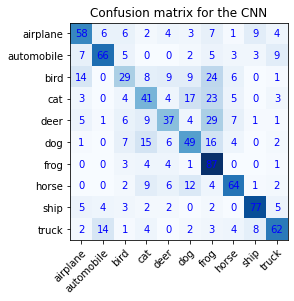

In [41]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
figure, axes = plt.subplots()
matrix = axes.imshow(nncm, cmap=plt.cm.Blues)
axes.set_xticks(np.arange(len(class_names)))
axes.set_yticks(np.arange(len(class_names)))
axes.set_xticklabels(class_names)
axes.set_yticklabels(class_names)
plt.setp(axes.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

for x in range(len(class_names)):
    for y in range(len(class_names)):
        text = axes.text(y, x, nncm[x,y], ha="center", va="center", color="b")
axes.set_title("Confusion matrix for the CNN")
plt.show()

### Training curves for the CNN

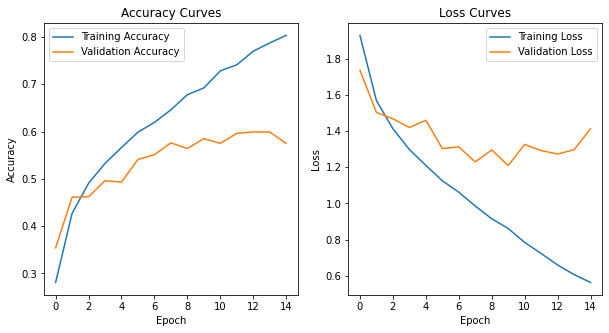

In [437]:
plt.figure(figsize=[10,5])
plt.subplot(121)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy',
           'Validation Accuracy'])
plt.title('Accuracy Curves')

plt.subplot(122)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training Loss',
           'Validation Loss'])
plt.title('Loss Curves')
plt.show()

## Attempt at NN using vectors obtained from Hog
### Iterated through training and testing images to obtain their feature vectors before standardising the data

In [5]:
arrays = [skimage.feature.hog(train_Image[:,:,:,x], pixels_per_cell=[2,2], cells_per_block=[3,3]) for x in range(10000)]
train_features = np.stack(arrays, axis=0)
arrays = [skimage.feature.hog(test_Image[:,:,:,x], pixels_per_cell=[2,2], cells_per_block=[3,3]) for x in range(1000)]
test_features = np.stack(arrays, axis=0)
print(test_features.shape)

(1000, 15876)


### Standardized the arrays

In [48]:
sc = StandardScaler()
sc.fit(train_features)
standard_train = sc.transform(train_features)
standard_test = sc.transform(test_features)
print(standard_train.shape)

(10000, 15876)


### Compiled using parameters which produced best results in previous attempt

In [54]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [55]:
history = model.fit(standard_train, train_Label, epochs=100, validation_split=0.2, verbose=1)

Epoch 1/100
250/250 [==============================] - 2s 7ms/step - loss: 2.1408 - accuracy: 0.3110 - val_loss: 2.0639 - val_accuracy: 0.3860
Epoch 2/100
250/250 [==============================] - 2s 7ms/step - loss: 1.9710 - accuracy: 0.4869 - val_loss: 2.0397 - val_accuracy: 0.4160
Epoch 3/100
250/250 [==============================] - 2s 6ms/step - loss: 1.8816 - accuracy: 0.5791 - val_loss: 2.0124 - val_accuracy: 0.4465
Epoch 4/100
250/250 [==============================] - 1s 5ms/step - loss: 1.8306 - accuracy: 0.6290 - val_loss: 2.0186 - val_accuracy: 0.4365
Epoch 5/100
250/250 [==============================] - 1s 6ms/step - loss: 1.7977 - accuracy: 0.6626 - val_loss: 2.0234 - val_accuracy: 0.4300
Epoch 6/100
250/250 [==============================] - 1s 6ms/step - loss: 1.7727 - accuracy: 0.6885 - val_loss: 2.0141 - val_accuracy: 0.4410
Epoch 7/100
250/250 [==============================] - 1s 6ms/step - loss: 1.7559 - accuracy: 0.7036 - val_loss: 2.0109 - val_accuracy: 0.4435

In [52]:
results = model.evaluate(standard_test, test_Label)
print(f'Test set loss: {results[0]:0.2f}, test set accuracy: {results[1]*100:0.2f}%')

32/32 [==============================] - 0s 2ms/step - loss: 2.0338 - sparse_categorical_accuracy: 0.4260
Test set loss: 2.03, test set accuracy: 42.60%


In [11]:
recognised_labels = model.predict(standard_test)
print(recognised_labels.shape)

(1000, 10)


#### Visualised the output to observe image characteristics

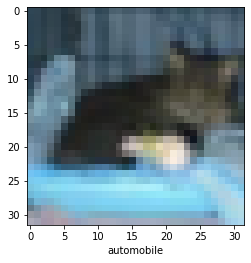

In [423]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
slice = 340
plt.figure(figsize=(4,4))
plt.imshow(test_Image[:,:,:,slice], cmap=plt.cm.binary)
plt.xlabel(class_names[np.argmax(recognised_labels[slice])])
plt.show()

## Training curves for my NN

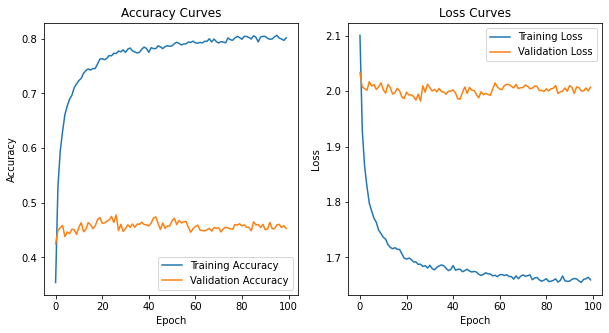

In [13]:
plt.figure(figsize=[10,5])
plt.subplot(121)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy',
           'Validation Accuracy'])
plt.title('Accuracy Curves')

plt.subplot(122)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training Loss',
           'Validation Loss'])
plt.title('Loss Curves')
plt.show()


In [31]:

cm = confusion_matrix(test_Label, np.argmax(recognised_labels, axis=1), labels= [0,1,2,3,4,5,6,7,8,9])
print(cm)

[[58  4  5  3  6  2  4  2 13  3]
 [ 4 57  3  6  4  0  3  1 12 10]
 [ 7  1 33 11  9 15  8  8  5  3]
 [ 1  6 14 33  9 17  8  5  1  6]
 [10  2 15 11 35 10  8  5  2  2]
 [ 2  1 11 21  5 41  7  7  3  2]
 [ 4  4 15  9  8 13 43  1  1  2]
 [ 1  0  7 10 11 12  1 51  2  5]
 [15 10  4  1  5  2  5  2 45 11]
 [ 4  4  2  0  7 10  3  5  9 56]]


The below code is based on a matplotlib example found on the API, it is only used to output the confusion
matrix in a cleaner format.
Source: https://matplotlib.org/3.3.3/gallery/images_contours_and_fields/image_annotated_heatmap.html#sphx-glr-gallery-images-contours-and-fields-image-annotated-heatmap-py

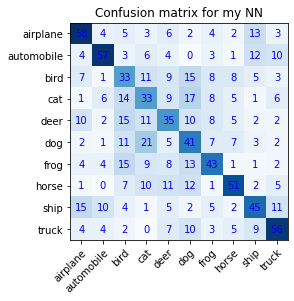

In [30]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
figure, axes = plt.subplots()
matrix = axes.imshow(cm, cmap=plt.cm.Blues)
axes.set_xticks(np.arange(len(class_names)))
axes.set_yticks(np.arange(len(class_names)))
axes.set_xticklabels(class_names)
axes.set_yticklabels(class_names)
plt.setp(axes.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

for x in range(len(class_names)):
    for y in range(len(class_names)):
        text = axes.text(y, x, cm[x,y], ha="center", va="center", color="b")
axes.set_title("Confusion matrix for my NN")
plt.show()